In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime

In [11]:
df = pd.read_csv('AAPL.csv')


In [13]:
df.tail()

,Date,Open,Close,High,Low,Volume
873,24-Jun-19,198.539993,198.580002,200.160004,198.169998,18220400
874,25-Jun-19,198.429993,195.570007,199.259995,195.289993,21070300
875,26-Jun-19,197.770004,199.800003,200.990005,197.350006,26067500
876,27-Jun-19,200.289993,199.740005,201.570007,199.570007,20899700
877,28-Jun-19,198.679993,197.919998,199.500000,197.050003,31110600


In [24]:
org = df.iloc[500:877,[0,2]]

In [56]:
org['rolling_mean_5'] = pd.Series.rolling(org['Close'],window= 5,center=False).mean()
    
org['rolling_mean_15'] = pd.Series.rolling(org['Close'],window= 15,center=False).mean()
    
org['rolling_mean_50'] = pd.Series.rolling(org['Close'],window= 50,center=False).mean()
    

In [57]:
org.head()

,Date,Close,rolling_mean_5,rolling_mean_15,rolling_mean_50
500,27-Dec-17,170.600006,NaN,NaN,NaN
501,28-Dec-17,171.080002,NaN,NaN,NaN
502,29-Dec-17,169.229996,NaN,NaN,NaN
503,2-Jan-18,172.259995,NaN,NaN,NaN
504,3-Jan-18,172.229996,171.079999,NaN,NaN


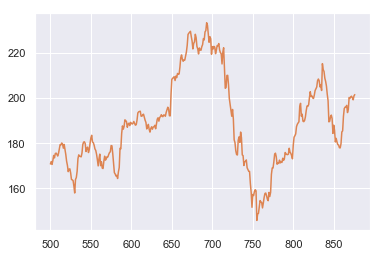

In [19]:
plt.plot(org,color = current_palette[1],label = 'Close')

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

/Users/ameyapatankar/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:

current_palette = sns.color_palette()

<Figure size 1440x720 with 0 Axes>

In [69]:
def crossover(Y):
    
    org = Y.iloc[500:877,[0,2]]
    
#     rolling_mean_5 = pd.Series.rolling(org['Close'],window= 5,center=False).mean()
    
#     rolling_mean_15 = pd.Series.rolling(org['Close'],window= 15,center=False).mean()
    
#     rolling_mean_50 = pd.Series.rolling(org['Close'],window= 50,center=False).mean()

    org['rolling_mean_5'] = pd.Series.rolling(org['Close'],window= 5,center=False).mean()
    
    org['rolling_mean_15'] = pd.Series.rolling(org['Close'],window= 15,center=False).mean()
        
    org['rolling_mean_50'] = pd.Series.rolling(org['Close'],window= 50,center=False).mean()
    
    
    plt.plot(org.Date,org.Close,color = current_palette[1],label = 'Close')
    plt.plot(org.Date,org.rolling_mean_5, color = 'blue', label = ' 5 day Moving Average')
    plt.plot(org.Date,org.rolling_mean_15, color = 'green', label = '15 day Moving Average')
    plt.plot(org.Date,org.rolling_mean_50, color = 'yellow', label = '50 day Moving Average')
    
#     plt.xticks(org.Date, rotation=0)
    _ = plt.xticks(org.Date[2::50],rotation='45')
#     plt.xlabel('Date')
    plt.ylabel('Closing',size = 20)
    _ = plt.title('Market Summary - Apple Inc',size = 20)
    
    

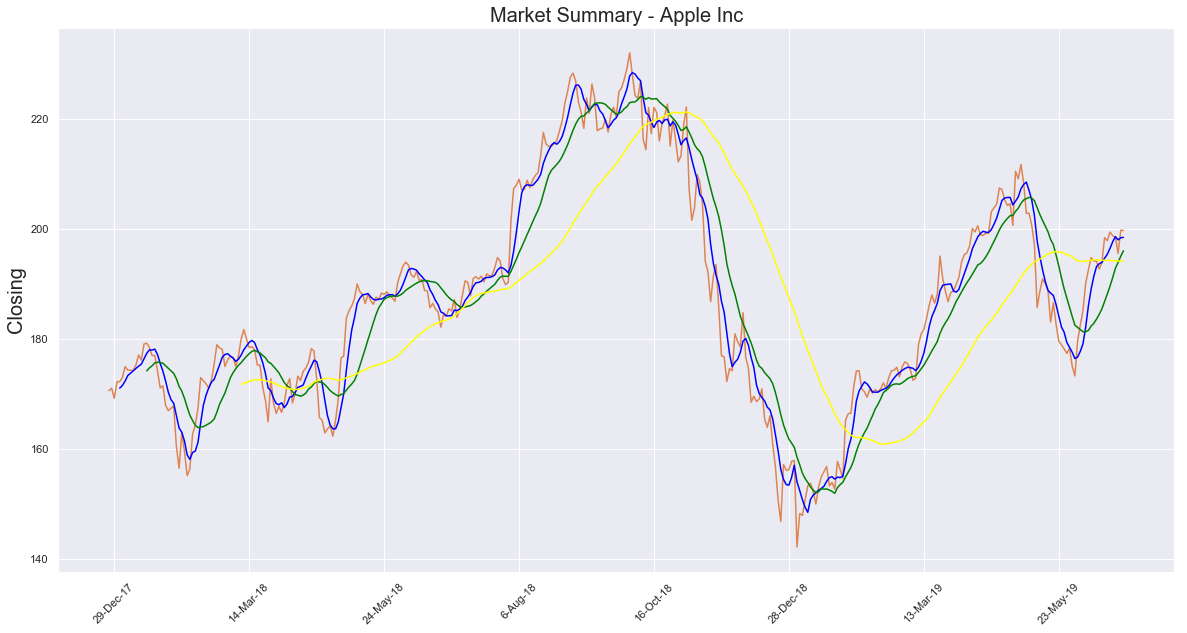

In [70]:
sns.set()
plt.figure(figsize=(20,10))

crossover(df)

### ARIMA

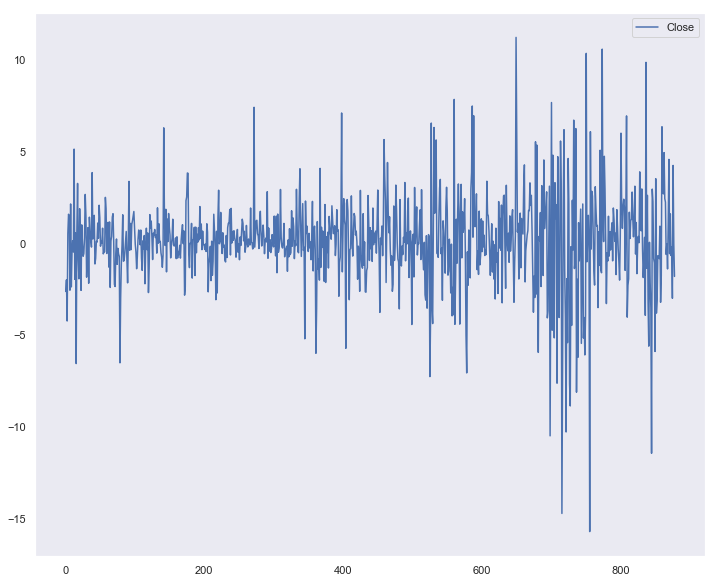

In [73]:
rate_log_diff = df['Close'] - df['Close'].shift()

rate_log_diff.dropna(inplace=True)

# plt.rcParams["figure.figsize"] = fig_size
plt.figure(figsize=(12,10))
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [74]:
df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

Test Statistic                -9.807874e+00
p-value                        5.761092e-17
#Lags Used                     7.000000e+00
Number of Observations Used    8.690000e+02
Critical Value (1%)           -3.437897e+00
Critical Value (5%)           -2.864872e+00
Critical Value (10%)          -2.568544e+00
dtype: float64


<Figure size 864x720 with 0 Axes>

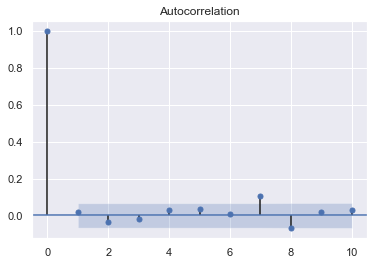

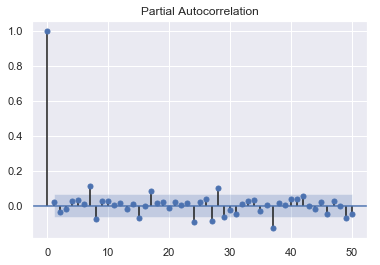

In [85]:
plt.figure(figsize=(12,10))
plot_acf(rate_log_diff,lags=10)
plt.show()

plot_pacf(rate_log_diff,lags=50)
plt.show()


In [81]:
rate_data_log= np.log(df['Close'])
decomposition = seasonal_decompose(df['Close'])

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'